# Trabalho 2
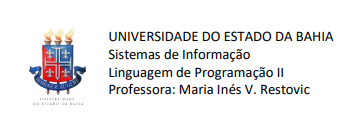


---

Alunos: 
*   Pedro Victor Santana Benevides
*   Rafael Roberto Coutinho da Cruz
*   Uendel Costa Lima



# Diagrama UML

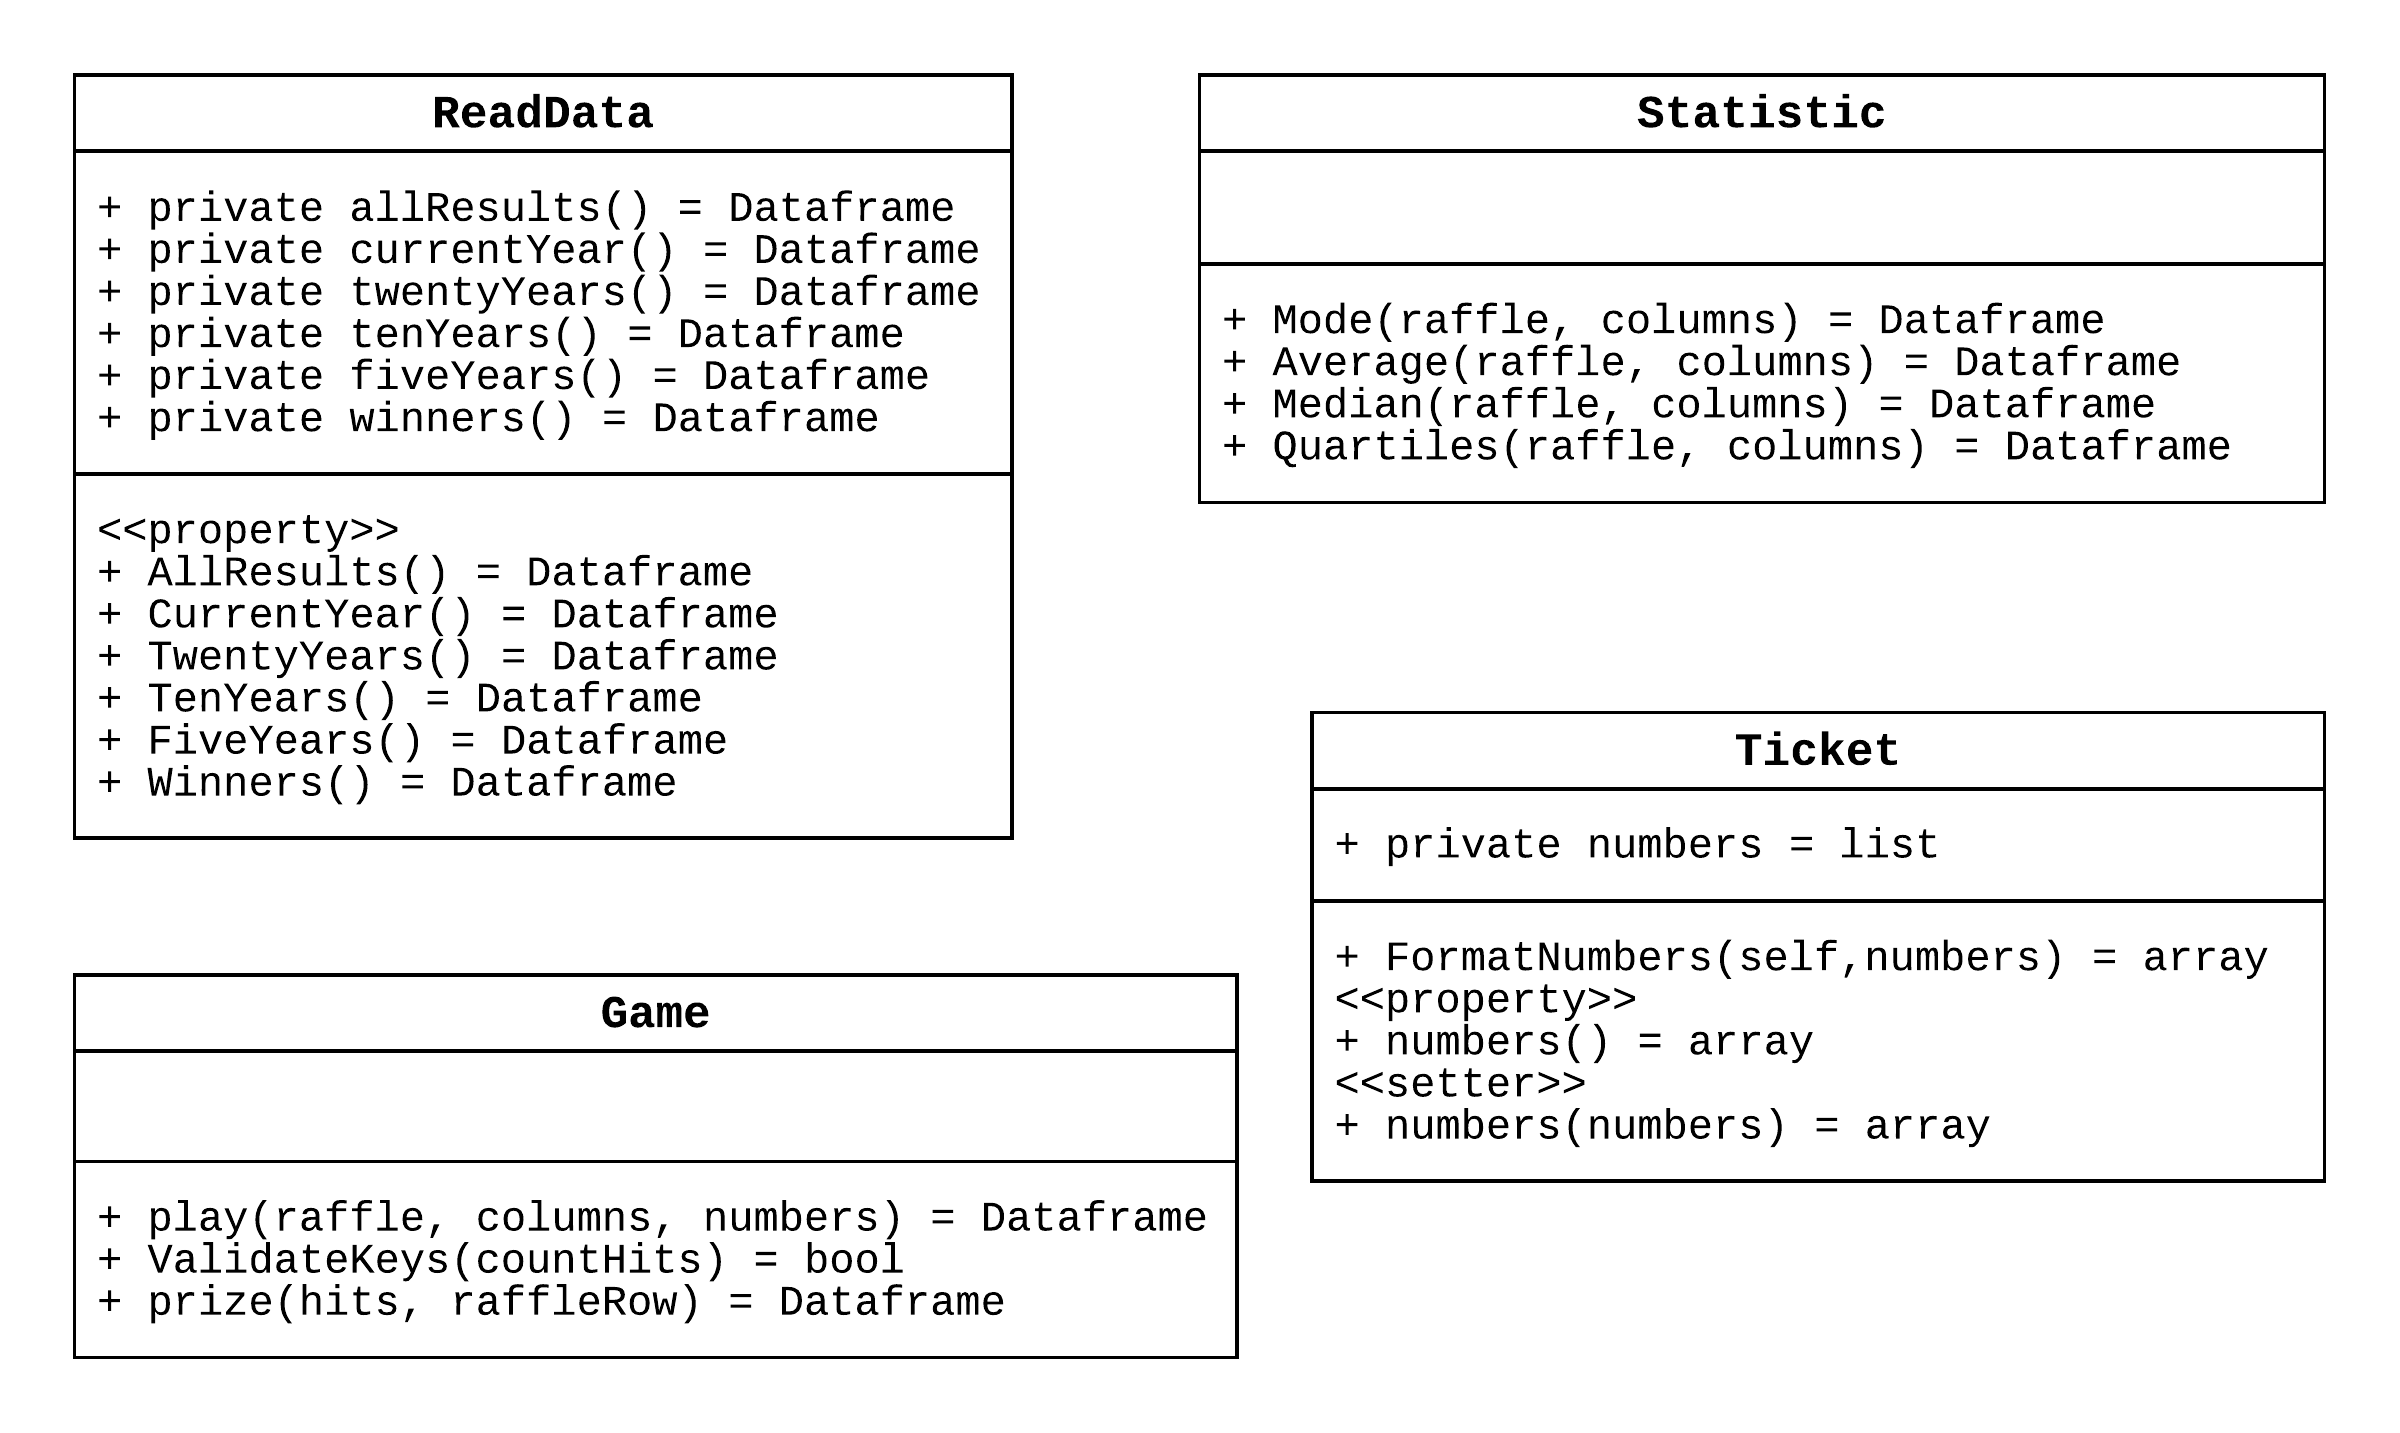

# Breve descrição

---
O programa a seguir apresenta 4 classes, como demonstrado no diagrama UML, o principal objetivo deste programa e ler um arquivo de dados excel e apresentar as principais informações que podem ser extraídas desses dados.

---

Funcionalidades: 
* Realizar o tratamento dos dados procurando:
  1. Linhas vazias;
  2. Erros nos valores (nan).

* Faz a descrição básica das estatísticas dos dados:
  1. Média; 
  2. Mediana; 
  3. Quartis; 
  4. Moda.

* Testa uma determinada sequência de números contra o datasete e informa se o bilhete foi premiado:
  1. Se for premiado, mostrar o número de acertos;
  2. Mostrar o número do concurso, data e o valor do prêmio sorteado;

* Separar do dataset os concursos por periodos e coloca-os em um dataset parte.
  1. 2010 a 2020;
  2. 2015 a 2020;
  3. Do inico até 2020;
  4. Somente 2021.

* Gera bilhetes a partir dos datasets usando a moda, ou seja os números que mais saíram.
  1. Exibir quantos acertos este bilhete teria em 2021 e calcular o lucro:
  
     Somar o preço de jogar nos concursos e subtrair do total ganho nas apostas.
  2. Informar se houve lucro ou prejuízo e de quanto foi o valor.




# Importando as bibliotecas necessárias:

In [ ]:
import pandas as pd;
import numpy as np;
from google.colab import files

# Realizando upload dos arquivos a serem utilizados:

---

Arquivo necessário: 

* Excel contendo dados da lotofácil obtidos no site da Caixa Econômica
Federal.

---







In [ ]:
uploadedExcel = files.upload()

Saving Trabalho LP.xlsx to Trabalho LP.xlsx


# Classe ReadData => 
Responsável por realizar a leitura e tratamento do arquivo de dados da lotofácil em formato xlsx, separando em datasetes os concursos por períodos.



In [ ]:
class ReadData:
    def __init__(self, file):
        allData = pd.read_excel(file);
        self.__allResults = allData.dropna(how='all').fillna(0); #excluir as linhas vazias, troca NaN por zero
        self.__currentYear = self.__allResults[ self.__allResults['Data Sorteio'] >= pd.Timestamp('2021-01-01')].reset_index(drop=True);  #sorteios de 2021
        self.__twentyYears = self.__allResults[ self.__allResults['Data Sorteio'] <= pd.Timestamp('2020-01-01')]; #resultados até 2020
        self.__tenYears = self.__twentyYears[ self.__twentyYears['Data Sorteio'] >= pd.Timestamp('2010-01-01')]; #resultados de 2010 até 2020
        self.__fiveYears = self.__tenYears[ self.__tenYears['Data Sorteio'] >= pd.Timestamp('2015-01-01')]; #resultados de 2015 até 2020
        
    @property 
    def AllResults(self):
      
      return self.__allResults

    @property 
    def CurrentYear(self):
    
      return self.__currentYear
    
    @property 
    def TwentyYears(self):
    
      return self.__twentyYears
    
    @property 
    def TenYears(self):
    
      return self.__tenYears
    
    @property 
    def FiveYears(self):
    
      return self.__fiveYears


# Classe Statistic => 
Contem métodos estatisticos necessarios como a moda, mediana, média e quartis. Podem ser selecionadas colunas especificas ou aplicar os métodos sobre todo o Dataframe.



In [ ]:
class Statistic():
    def __init__(self):
      return

    def Mode(self, raffle, columns = 0): #retorna a moda 
          if columns != 0:

            return raffle[columns].mode();
          else:
            
            return raffle.mode(); 
    
    def Average(self, raffle, columns = 0): #retorna a média 
          if columns != 0:

            return raffle[columns].mean();
          else:
            
            return raffle.mean();
    
    def Median(self, raffle, columns = 0): #retorna a mediana 
          if columns != 0:

            return raffle[columns].median();
          else:
            
            return raffle.median();

    def Quartiles(self, raffle, percent = [0.5], columns = 0): #retorna a quartis 
          if columns != 0:

            return raffle[columns].quantile(percent);
          else:
            
            return raffle.quantile(percent);

# Classe Ticket => 
Classe que representa o ticket com os números a serem jogados no sorteio, deve receber uma lista com os numeros escilhidos. Contem um método para formatação caso os numeros venham de uma lista indexada, como as de um Dataframe.


In [ ]:
class Ticket():
  def __init__(self, numbers = 0):
    if numbers != 0:
      self.__numbers = self.FormatNumbers(numbers);
    else:
      self.__numbers = [];

  def FormatNumbers(self, numbers):
    chooses = [];

    for value in numbers:
      chooses.append(int(value));
    
    return chooses;
   
  @property 
  def numbers(self):
  
    return self.__numbers

  @numbers.setter
  def numbers(self, numbers):
    self.__numbers = self.FormatNumbers(numbers);


# Classe Game => 
Esta Classe é responsavel por realizar a comparação dos numeros dos tickets com os numeros dos sorteios presentes no dataframe a ser passado. O metodo Play() irá retornar um novo Dataframe com os dados dos sorteios em que houveram ao menos o número minimo de acertos para premiação assim como o valor gasto até o momento do sorteio ganho e o lucro da mesma forma. O Lucro pela diferença entre o acumulado de ganhos e o acumulado dos gastos, um lucro negativo representa um prejuizo.

In [ ]:
class Game():
  def __init__(self):
    return

  def play(self, raffle, columns, numbers):
    compareTicket = (numbers == raffle[columns]);
    prize = 0;
    spent = 0;
    wins = [];
    for idx in raffle.index:
      spent += 2.5;
      countHits = pd.DataFrame(compareTicket.iloc[idx].value_counts());
      if (self.ValidateKeys(countHits)):
        raffleRow = self.prize(int(countHits.loc[True]), raffle.iloc[idx]);
        prize += int(raffleRow[['Premiação']]);
        raffleRow['Gastos'] = spent;
        raffleRow['Lucro'] = prize - spent;
        wins.append(raffleRow);

    winsDf = pd.DataFrame(wins);

    if len(winsDf.index.values) < 1:

      return (f'Este bilhete não venceu nenhum sorteio. Total de gastos com jogos: {spent}')
    else:

      return winsDf.reset_index(drop=True)

  def ValidateKeys(self, countHits):
    firstVerify = countHits.index.equals(pd.Index([True]));
    secondVerify = countHits.index.equals(pd.Index([True, False]));

    if firstVerify or secondVerify:
      if int(countHits.loc[True]) >= 11:
        
        return True
      else:
        
        return False
    else:
      
      return False

  def prize(self, hits, raffleRow): 
    row = raffleRow.copy();

    if hits == 11:
      row['Premiação'] = row['Valor_Rateio_11_Números']; 
      row['Acertos'] = hits;

      return row[['Concurso', 'Data Sorteio', 'Premiação', 'Acertos']];
    elif hits == 12:
      row['Premiação'] = row['Valor_Rateio_12_Números'];
      row['Acertos'] = hits;

      return row[['Concurso', 'Data Sorteio', 'Premiação', 'Acertos']];
    elif hits == 13:
      row['Premiação'] = row['Valor_Rateio_13_Números'];
      row['Acertos'] = hits;

      return row[['Concurso', 'Data Sorteio', 'Premiação', 'Acertos']];
    elif hits == 14:
      row['Premiação'] = row['Valor_Rateio_14_N��meros'];
      row['Acertos'] = hits;

      return row[['Concurso', 'Data Sorteio', 'Premiação', 'Acertos']];
    elif hits == 15:
      row['Premiação'] = row['Valor_Rateio_15_Números'];
      row['Acertos'] = hits;

      return row[['Concurso', 'Data Sorteio', 'Premiação', 'Acertos']];
    
    return False

# Instanciando classes e declarando variáveis: 

In [ ]:
raffle = ReadData('Trabalho LP.xlsx');
ibge = Statistic();
Lotofacil = Game();

randomTicket = Ticket();
currentTicket = Ticket();
twentyTicket = Ticket(); 
tenTicket = Ticket();
fiveTicket = Ticket();
quartileTicket = Ticket();
testeTicket = Ticket();

numbersColumns = ['Bola1','Bola2','Bola3','Bola4','Bola5','Bola6','Bola7','Bola8','Bola9','Bola10','Bola11','Bola12','Bola13','Bola14','Bola15'];

# Escolha dos números nos tickets:

In [ ]:
randomTicket.numbers = sorted(np.random.permutation(range(1,26))[:15]); 
currentTicket.numbers =  ibge.Mode(raffle.CurrentYear,).iloc[0,2:17]; 
twentyTicket.numbers = ibge.Mode(raffle.TwentyYears,).iloc[0,2:17];   
tenTicket.numbers = ibge.Mode(raffle.TenYears,).iloc[0,2:17];        
fiveTicket.numbers =  ibge.Mode(raffle.FiveYears,).iloc[0,2:17];      
q4 = ibge.Quartiles(raffle.CurrentYear,[.25, .5, .75, 1], numbersColumns);
quartileTicket.numbers = ibge.Average(q4);

In [ ]:
print(f'bilhete aleatorio gerado: {randomTicket.numbers}\n'); # ticket aleatorio

print(f'bilhete com a moda dos numeros dos sorteios 1 até 2020: {twentyTicket.numbers}\n'); # ticket1

print(f'bilhete  com a moda dos numeros dos sorteios 2010 até 2020: {tenTicket.numbers}\n'); # ticket2

print(f'bilhete com a moda dos numeros dos sorteios 2015 até 2020: {fiveTicket.numbers}\n'); # ticket3

print(f'bilhete com a moda dos numeros dos sorteios de 2021: {currentTicket.numbers}\n'); # ticket4

print(f'bilhete com a média dos quartis dos números de 2021: {quartileTicket.numbers}\n'); # ticket5


bilhete aleatorio gerado: [1, 4, 6, 8, 9, 12, 13, 15, 16, 17, 19, 20, 21, 22, 25]

bilhete com a moda dos numeros dos sorteios 1 até 2020: [1, 2, 4, 6, 8, 10, 11, 14, 15, 16, 19, 20, 22, 24, 25]

bilhete  com a moda dos numeros dos sorteios 2010 até 2020: [1, 2, 4, 5, 8, 10, 11, 13, 15, 16, 18, 20, 22, 24, 25]

bilhete com a moda dos numeros dos sorteios 2015 até 2020: [1, 2, 4, 5, 7, 10, 11, 14, 15, 16, 19, 20, 22, 24, 25]

bilhete com a moda dos numeros dos sorteios de 2021: [1, 3, 5, 6, 8, 10, 11, 13, 14, 17, 19, 20, 22, 24, 25]

bilhete com a média dos quartis dos números de 2021: [2, 4, 6, 8, 9, 11, 12, 14, 15, 17, 18, 20, 21, 23, 24]



# Realizando jogos com todos os tickets em sorteios de 2021 =>

In [ ]:
randomPlay = Lotofacil.play(raffle.CurrentYear, numbersColumns, randomTicket.numbers);

twentyPlay = Lotofacil.play(raffle.CurrentYear, numbersColumns, twentyTicket.numbers);

tenPlay = Lotofacil.play(raffle.CurrentYear, numbersColumns, tenTicket.numbers);

fivePlay = Lotofacil.play(raffle.CurrentYear, numbersColumns, fiveTicket.numbers);

currentPlay = Lotofacil.play(raffle.CurrentYear, numbersColumns, currentTicket.numbers);

quartilePlay = Lotofacil.play(raffle.CurrentYear, numbersColumns, quartileTicket.numbers);


# Resultados =>

In [ ]:
print('# Resultados dos jogos =>');

print(f'Resultado ticket aleatorio :\n');
print(f'{randomPlay}\n');

print(f'Resultado ticket 1:\n');
print(f'{twentyPlay}\n');

print(f'Resultado ticket 2:\n');
print(f'{tenPlay}\n');

print(f'Resultado ticket 3:\n');
print(f'{fivePlay}\n');

print(f'Resultado ticket 4:\n');
print(f'{currentPlay}\n');

print(f'Resultado ticket 5:\n');
print(f'{quartilePlay}\n');


# Resultados dos jogos =>
Resultado ticket aleatorio :

   Concurso Data Sorteio  Premiação  Acertos  Gastos  Lucro
0      2291   2021-07-26        5.0       11   425.0 -420.0

Resultado ticket 1:

Este bilhete não venceu nenhum sorteio. Total de gastos com jogos: 602.5

Resultado ticket 2:

Este bilhete não venceu nenhum sorteio. Total de gastos com jogos: 602.5

Resultado ticket 3:

Este bilhete não venceu nenhum sorteio. Total de gastos com jogos: 602.5

Resultado ticket 4:

Este bilhete não venceu nenhum sorteio. Total de gastos com jogos: 602.5

Resultado ticket 5:

Este bilhete não venceu nenhum sorteio. Total de gastos com jogos: 602.5



# Realizando jogos com todos os tickets em todos os sorteios =>

In [ ]:
randomPlay = Lotofacil.play(raffle.AllResults, numbersColumns, randomTicket.numbers);

twentyPlay = Lotofacil.play(raffle.AllResults, numbersColumns, twentyTicket.numbers);

tenPlay = Lotofacil.play(raffle.AllResults, numbersColumns, tenTicket.numbers);

fivePlay = Lotofacil.play(raffle.AllResults, numbersColumns, fiveTicket.numbers);

currentPlay = Lotofacil.play(raffle.AllResults, numbersColumns, currentTicket.numbers);

quartilePlay = Lotofacil.play(raffle.AllResults, numbersColumns, quartileTicket.numbers);


# Resultados =>

In [ ]:
print('# Resultados dos jogos =>');

print(f'Resultado ticket aleatorio :\n');
print(f'{randomPlay}\n');

print(f'Resultado ticket 1:\n');
print(f'{twentyPlay}\n');

print(f'Resultado ticket 2:\n');
print(f'{tenPlay}\n');

print(f'Resultado ticket 3:\n');
print(f'{fivePlay}\n');

print(f'Resultado ticket 4:\n');
print(f'{currentPlay}\n');

print(f'Resultado ticket 5:\n');
print(f'{quartilePlay}\n');


# Resultados dos jogos =>
Resultado ticket aleatorio :

   Concurso Data Sorteio  Premiação  Acertos  Gastos   Lucro
0        35   2004-05-24       10.0       13    87.5   -77.5
1       769   2012-06-22        2.5       11  1922.5 -1910.5
2      1050   2014-05-02        5.0       12  2625.0 -2608.0
3      2361   2021-10-30       10.0       12  5902.5 -5875.5

Resultado ticket 1:

   Concurso Data Sorteio  Premiação  Acertos  Gastos   Lucro
0       211   2007-04-16        2.0       11   527.5  -525.5
1      1208   2015-05-13        3.0       11  3020.0 -3015.0
2      1546   2017-08-04        4.0       11  3865.0 -3856.0
3      1949   2020-04-03        5.0       11  4872.5 -4858.5

Resultado ticket 2:

   Concurso Data Sorteio  Premiação  Acertos  Gastos   Lucro
0       122   2006-01-23        2.0       11   305.0  -303.0
1      1927   2020-02-10        5.0       11  4817.5 -4810.5
2      1941   2020-03-16        5.0       11  4852.5 -4840.5

Resultado ticket 3:

   Concurso Data Sorteio

# Outros dados estatísticos =>

In [ ]:
print(f'Arrecadação Total. \nMédia:', round(ibge.Average(raffle.TwentyYears, 'Arrecadacao_Total')), '\nMediana:', round(ibge.Median(raffle.TwentyYears, 'Arrecadacao_Total')), '\n');

print(f'Estimativa Premio. \nMédia:', round(ibge.Average(raffle.TwentyYears, 'Estimativa_Premio')), '\nMediana:', round(ibge.Median(raffle.TwentyYears, 'Estimativa_Premio')), '\n'); 

print(f'Valor Acumulado Especial. \nMédia:', round(ibge.Average(raffle.TwentyYears, 'Valor_Acumulado_Especial')), '\nMediana:', round(ibge.Median(raffle.TwentyYears, 'Valor_Acumulado_Especial')), '\n'); 

Arrecadação Total. 
Média: 17298572 
Mediana: 19275057 

Estimativa Premio. 
Média: 1891780 
Mediana: 1600000 

Valor Acumulado Especial. 
Média: 16985158 
Mediana: 4662530 

